# 03 - Rhythm Spectrum Entropy across Groups

## Imports

In [1]:
import avn.timing as timing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

## Adult Birds

In [3]:
All_Birds = ["B145", "B236", "B258", "B385", "B402", "B447", 
             "B507", "G255", "G397", "G402", "G413", "G437", 
             "G439", "G524", "G528", "O144", "O254", "O421", 
             "O440", "O512", "R402", "R425", "R469", "S132", 
             "S421", "S525", "S528", "Y389", "Y397", "Y425", 
             "Y440", "B524", "O434", "S389", "Y433", "Y453"] 

#All_Birds should contain 36 bird IDs. Check: 
len(All_Birds)

36

### Calculate Rhythm Spectrum Entropy and CV peak freq

In [8]:
#initialize empty dataframe
rhythm_spect_feats = pd.DataFrame()

#loop over each bird
for Bird_ID in All_Birds:
    print(Bird_ID)
    #create RhythmAnalysis object
    rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
    #set path to song files
    song_folder_path = 'E:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\' + Bird_ID + "\\"
    #create rhythm spectrogram
    rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
    #calculate entropy and peak freq cv
    entropy = rhythm_analysis.calc_rhythm_spectrogram_entropy()

    peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
    peak_freq_cv = rhythm_analysis.calc_peak_frequency_cv()
    #save features in temporary df
    curr_df = pd.DataFrame({'Bird_ID' : Bird_ID, 
                            'rhythm_entropy' : [entropy], 
                            'peak_freq_cv' : [peak_freq_cv]})
    #append to df with all birds. 
    rhythm_spect_feats = pd.concat([rhythm_spect_feats, curr_df])


B145
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
B236
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
B258
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file 

In [10]:
rhythm_spect_feats.head(3)

,Bird_ID,rhythm_entropy,peak_freq_cv
0,B145,-0.131574,0.079447
0,B236,-0.175278,0.072484
0,B258,-0.468630,0.042943


In [11]:
rhythm_spect_feats.to_csv('adult_rhythm_spectrum_features.csv')

## Juvenile Birds

In [14]:
all_birds = glob.glob('E:\\Juveniles\\Single_day_per_juvenile\\*')
all_birds = [x.split('\\')[-1] for x in all_birds]
all_birds

['Y855_51',
 'S856_51',
 'Y856_50',
 'S855_51',
 'S833_51',
 'O833_51',
 'notag833_51',
 'O883_51',
 'R833_51',
 'O472_50',
 'Y472_50']

In [16]:
#initialize empty dataframe
rhythm_spect_feats = pd.DataFrame()

#loop over each bird
for Bird_ID in all_birds:
    print(Bird_ID)
    #create RhythmAnalysis object
    rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
    #set path to song files
    song_folder_path = 'E:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
    #create rhythm spectrogram
    rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
    #calculate entropy and peak freq cv
    entropy = rhythm_analysis.calc_rhythm_spectrogram_entropy()

    peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
    peak_freq_cv = rhythm_analysis.calc_peak_frequency_cv()
    #save features in temporary df
    curr_df = pd.DataFrame({'Bird_ID' : Bird_ID, 
                            'rhythm_entropy' : [entropy], 
                            'peak_freq_cv' : [peak_freq_cv]})
    #append to df with all birds. 
    rhythm_spect_feats = pd.concat([rhythm_spect_feats, curr_df])


Y855_51
S856_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
Y856_50
S855_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
S833_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. Fi

In [17]:
rhythm_spect_feats.head(3)

,Bird_ID,rhythm_entropy,peak_freq_cv
0,Y855_51,-0.183136,0.092551
0,S856_51,-0.113872,0.046261
0,Y856_50,-0.211456,0.089261


In [18]:
rhythm_spect_feats.to_csv('juvenile_rhythm_spectrum_features.csv')

## Comparing Groups

In [2]:
adult = pd.read_csv('adult_rhythm_spectrum_features.csv').drop(columns = 'Unnamed: 0')
all_birds = pd.read_csv("E:\\Final_Bird_Dataset\\old_Bird_list.csv")
adult = pd.merge(adult, all_birds[['Bird_ID', 'Condition']], on = 'Bird_ID')

group_dict = {'Isolate' : 'Isolate Adult', 
              'GFP' : 'Typical Adult', 
              'FP1_KD_pre_tut' : 'FP1 KD Adult', 
              'FP1_KD_post_tut' : 'Typical Adult'}
adult['Group'] = [group_dict[x] for x in adult.Condition]

In [3]:
juvenile = pd.read_csv('juvenile_rhythm_spectrum_features.csv').drop(columns = 'Unnamed: 0')
juvenile['Group'] = 'Juvenile'

In [4]:
all_rhythm_feats = pd.concat([adult[['Bird_ID', 'Group', 'rhythm_entropy', 'peak_freq_cv']], juvenile])

In [5]:
all_rhythm_feats.head()

,Bird_ID,Group,rhythm_entropy,peak_freq_cv
0,B145,Isolate Adult,-0.131574,0.079447
1,B236,Isolate Adult,-0.175278,0.072484
2,B258,Isolate Adult,-0.468630,0.042943
3,B385,Typical Adult,-0.268079,0.097509
4,B402,FP1 KD Adult,-0.297027,0.112586


In [6]:
all_rhythm_feats.Group = all_rhythm_feats.Group.astype('category').cat.set_categories(['Typical Adult', 'Isolate Adult', 'FP1 KD Adult', 'Juvenile'], ordered = True)

### Rhythm Spectrum Entropy

In [9]:
plt.rcParams.update({'font.size': 11})

Text(0.5, 1.0, 'Rhythm Spectrum Entropy')

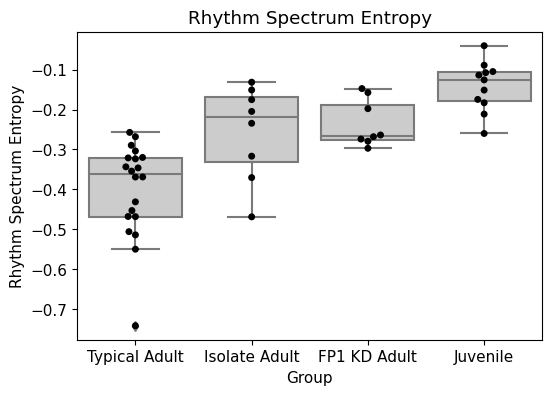

In [12]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = all_rhythm_feats, x = 'Group', y = 'rhythm_entropy', color = '0.8')
sns.swarmplot(data = all_rhythm_feats, x = 'Group', y = 'rhythm_entropy', color = 'black', s = 5)
plt.ylabel('Rhythm Spectrum Entropy')
plt.title('Rhythm Spectrum Entropy')

In [13]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
isolates_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group== 'Isolate Adult']
normal_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'Typical Adult']
FP1_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'FP1 KD Adult']
juvenile_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'Juvenile']

In [15]:
fvalue, pvalue = f_oneway(isolates_AVN, normal_AVN, FP1_AVN, juvenile_AVN)
print(fvalue, pvalue)

17.35167326437551 1.5712828447249097e-07


In [16]:
tukey = pairwise_tukeyhsd(endog = all_rhythm_feats['rhythm_entropy'], 
                          groups = all_rhythm_feats['Group'], 
                          alpha = 0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 FP1 KD Adult Isolate Adult   -0.021 0.9744 -0.1538  0.1118  False
 FP1 KD Adult      Juvenile   0.0936 0.1941 -0.0298   0.217  False
 FP1 KD Adult Typical Adult  -0.1641 0.0016 -0.2752  -0.053   True
Isolate Adult      Juvenile   0.1146 0.0772 -0.0088   0.238  False
Isolate Adult Typical Adult  -0.1431 0.0068 -0.2542 -0.0321   True
     Juvenile Typical Adult  -0.2577    0.0 -0.3574  -0.158   True
------------------------------------------------------------------


### CV Peak Frequency

In [17]:
all_rhythm_feats.head(2)

,Bird_ID,Group,rhythm_entropy,peak_freq_cv
0,B145,Isolate Adult,-0.131574,0.079447
1,B236,Isolate Adult,-0.175278,0.072484


Text(0.5, 1.0, 'Rhythm Spectrogram Peak Frequency CVs')

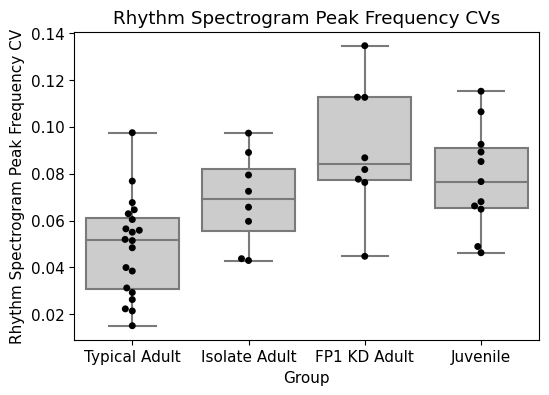

In [18]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', color = '0.8')
sns.swarmplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', color = 'black', s = 5)
plt.ylabel('Rhythm Spectrogram Peak Frequency CV')
plt.title('Rhythm Spectrogram Peak Frequency CVs')

In [19]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
isolates_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group== 'Isolate Adult']
normal_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'Typical Adult']
FP1_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'FP1 KD Adult']
juvenile_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'Juvenile']

In [21]:
fvalue, pvalue = f_oneway(isolates_AVN, normal_AVN, FP1_AVN, juvenile_AVN)
print(fvalue, pvalue)

8.520323801841228 0.00014833025484592917


In [22]:
tukey = pairwise_tukeyhsd(endog = all_rhythm_feats['peak_freq_cv'], 
                          groups = all_rhythm_feats['Group'], 
                          alpha = 0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 FP1 KD Adult Isolate Adult  -0.0221 0.2091 -0.0518  0.0076  False
 FP1 KD Adult      Juvenile  -0.0127 0.6099 -0.0404  0.0149  False
 FP1 KD Adult Typical Adult  -0.0422 0.0003 -0.0671 -0.0174   True
Isolate Adult      Juvenile   0.0094 0.8024 -0.0183   0.037  False
Isolate Adult Typical Adult  -0.0201   0.15  -0.045  0.0047  False
     Juvenile Typical Adult  -0.0295 0.0053 -0.0518 -0.0072   True
------------------------------------------------------------------
